# Fish AI

Real time fish counter and identification

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2
from darkflow.net.build import TFNet

%config InlineBackend.figure_format = 'svg'

In [10]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'thresh': 0.2,
    'gpu': 0
}

tfnet = TFNet(options)

/home/ubuntu/fish-ai/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.008929729461669922s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +b

In [17]:
img = cv2.imread('media/fish-img-01.jpg', cv2.IMREAD_COLOR)
result = tfnet.return_predict(img)

result

[{'label': 'bird',
  'confidence': 0.15547058,
  'topleft': {'x': 108, 'y': 154},
  'bottomright': {'x': 232, 'y': 218}},
 {'label': 'bowl',
  'confidence': 0.23001693,
  'topleft': {'x': 14, 'y': 272},
  'bottomright': {'x': 128, 'y': 328}},
 {'label': 'broccoli',
  'confidence': 0.21573445,
  'topleft': {'x': 344, 'y': 315},
  'bottomright': {'x': 877, 'y': 667}}]

In [14]:
tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']

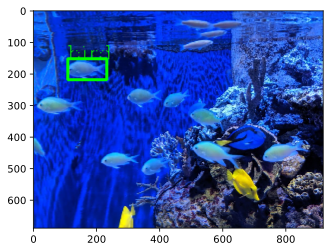

In [34]:
img = cv2.rectangle(img, tl, br, (0, 255, 0), 4)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.putText(img2, label, tl, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
                   fontScale = 2, color = (0, 255, 0))

plt.imshow(img2)
plt.show()